In [1]:
import random 
from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion,
    OpticalDistortion,
    CLAHE,
    ShiftScaleRotate,
    OneOf,
    RandomBrightnessContrast,
    RandomGamma
)

In [2]:
import cv2
img = cv2.imread('./polypoids/train/images/polypoid3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread('./polypoids/train/masks/polypoid3m.png', 0)
print(img.shape, mask.shape)

(360, 360, 3) (360, 360)


In [3]:
import numpy as np
from matplotlib import pyplot as plt
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [4]:
class Augmentation(object):

    def __init__(self):
        super(Augmentation, self).__init__()

        self._hflip = HorizontalFlip(p=0.8)
        self._vflip = VerticalFlip(p=0.8)
        self._clahe = CLAHE(p=1)
        self._rotate = RandomRotate90(p=1)
        self._brightness = RandomBrightnessContrast(p=0.8)
        self._gamma = RandomGamma(p=0.8)
        self._transpose = Transpose(p=0.8)
        self._elastic = ElasticTransform(
            p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
        self._distort = GridDistortion(p=0.8)
        self._affine = ShiftScaleRotate(
            shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=0.8)

        self.aug_dict = {'hflip': self._hflip, 'vflip': self._vflip, 'rotate': self._rotate,
                         'elastic': self._elastic, 'distort': self._distort, 'transpose': self._transpose,
                         'clahe': self._clahe, 'bright': self._brightness, 'gamma': self._gamma,
                         'affine': self._affine
                         }

    def _aug(self):
        iter_max = 0
        aug = []
        while iter_max < random.randint(0,2):
            self.aug = random.choice(list(self.aug_dict.values()))
            aug.append(self.aug)
            iter_max += 1
        return OneOf(aug)

I: 255, M: 255


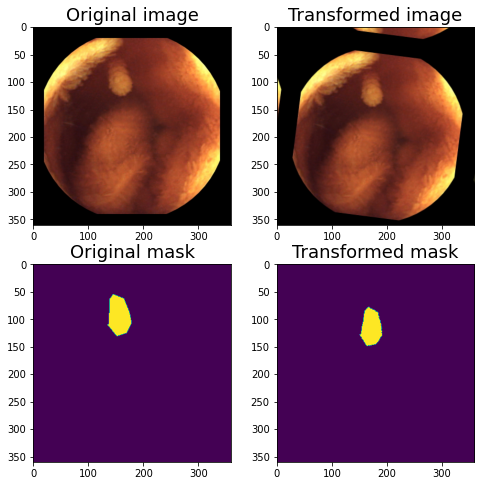

In [5]:
aug = Augmentation()
_aug = aug._aug()

augmented = _aug(image=img, mask=mask)
i = augmented['image']
m = augmented['mask']
print('I: {}, M: {}'.format(np.max(i), np.max(m)))
visualize(i, m, img, mask)